In [21]:
import sys
sys.path.append('../src')

from utils import load_data, get_wins_and_podiums

df = load_data('../data/Race.csv')

# Sostituisci 'C. Vietti' con il pilota che vuoi analizzare
wins, podiums = get_wins_and_podiums(df, 'F. Bagnaia')
print(f"Vittorie: {wins}")
print(f"Podii: {podiums}")

Vittorie: 26
Podii: 49


In [22]:
import sys
sys.path.append('../src')
import importlib
import utils
import pandas as pd

importlib.reload(utils)
from utils import load_data, get_race_order

# Parametri
rider1 = 'F. Bagnaia'
rider2 = 'M. Marquez'
classe = 'MotoGP'   # categoria (class)
session = 'Race'    # tipo di gara (Race / Sprint)
year = 2024

# Carica dataset
df = load_data('../data/Race.csv')

# normalizza i nomi delle colonne
df.columns = df.columns.str.lower()

# 🔹 Filtra per classe, sessione, anno e piloti scelti
df_filtered = df[
    (df['class'] == classe) &
    (df['session'] == session) &
    (df['year'] == year) &
    (df['rider'].isin([rider1, rider2]))
]

# 🔹 Pivot: righe = rider, colonne = eventi, valori = punti
points = df_filtered.pivot_table(
    index='rider', 
    columns='event', 
    values='pts', 
    aggfunc='first'
)

# 🔹 Ordina colonne secondo calendario ufficiale
race_order = get_race_order()
race_order_present = [ev for ev in race_order if ev in points.columns]
points = points.reindex(columns=race_order_present)

# Mostra tabella finale
display(points)


event,THA,AME,QAT,SPA,FRA,GBR,ARA,ITA,NED,GER,AUT,CAT,RSM,JPN,INA,AUS,MAL,POR
rider,,,,,,,,,,,,,,,,,,
F. Bagnaia,25.0,11.0,25.0,25.0,16.0,16.0,0.0,25.0,25.0,25.0,25.0,25.0,20.0,25.0,16.0,16.0,25.0,0.0
M. Marquez,5.0,0.0,13.0,20.0,20.0,13.0,25.0,13.0,6.0,20.0,13.0,16.0,25.0,16.0,0.0,25.0,4.0,0.0


In [23]:
import sys
sys.path.append('../src')
from utils import load_data, get_dnf_riders

df = load_data('../data/Race.csv')
df.columns = df.columns.str.lower()

anno = 2025
session = 'Race'
classe = 'MotoGP'
event = 'ITA'

ritiri = get_dnf_riders(df, anno, session, classe, event)

if not ritiri:
    print("Nessun pilota ritirato.")
else:
    print("Piloti ritirati e giro di ritiro:")
    for rider, giro in ritiri:
        print(f"- {rider} (ritiro al giro: {giro})")

Piloti ritirati e giro di ritiro:
- J. Miller (ritiro al giro: 9)
- M. Viñales (ritiro al giro: 8)
- J. Zarco (ritiro al giro: 3)
- E. Bastianini (ritiro al giro: None)


Questa tabella mostra il confronto tra i team per punti, vittorie e podi in una stagione e classe specifica.

In [24]:
from utils import load_data, get_team_stats

df = load_data('../data/Race.csv')
df.columns = df.columns.str.lower()

# Parametri per l'analisi
classe = 'MotoGP'
anno = 2025

team_stats = get_team_stats(df, classe=classe, year=anno)
display(team_stats)

,Punti,Vittorie,Podi
team,,,
Ducati Lenovo Team,647.0,22,37
BK8 Gresini Racing MotoGP,404.0,2,23
Pertamina Enduro VR46 Racing Team,309.0,0,6
Red Bull KTM Factory Racing,211.0,0,2
Aprilia Racing,183.0,1,5
Monster Energy Yamaha MotoGP Team,149.0,0,2
Red Bull KTM Tech3,133.0,0,1
Trackhouse MotoGP Team,123.0,0,0
CASTROL Honda LCR,109.0,1,2


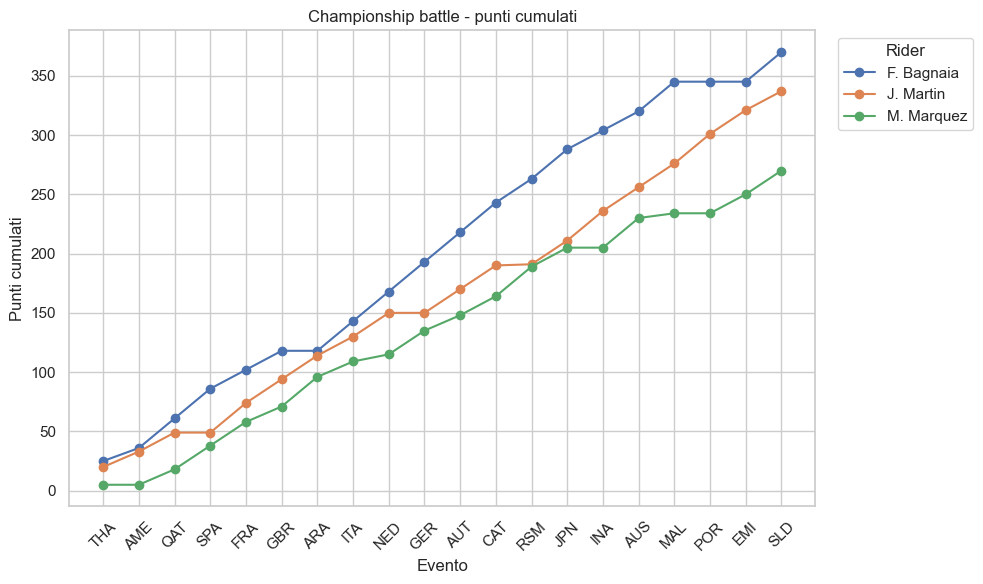

In [25]:
import sys
sys.path.append('../src')
from utils import load_data, compute_cumulative_points, plot_championship_battle
import matplotlib.pyplot as plt

df = load_data('../data/Race.csv') # Carica il dataset
df.columns = df.columns.str.lower() # Normalizza i nomi delle colonne

# Parametri 
classe = 'MotoGP' # classe da analizzare
year = 2024
top_n = 3

cum = compute_cumulative_points(df, classe, year, top_n=top_n)
if cum.empty:
    print("Nessun dato disponibile per i parametri specificati.")
else:
    ax = plot_championship_battle(cum)
    plt.show()

Analisi semplice: conteggio dei DNFs per evento

Scopo:
- Identificare i circuiti con più ritiri nella stagione selezionata.
- Vsualizzazione semplice e immediata con un bar chart orizzontale.

,dnf_count
event,
INA,9
SPA,8
AME,6
FRA,6
JPN,6
THA,6
ARA,5
GBR,4
MAL,4


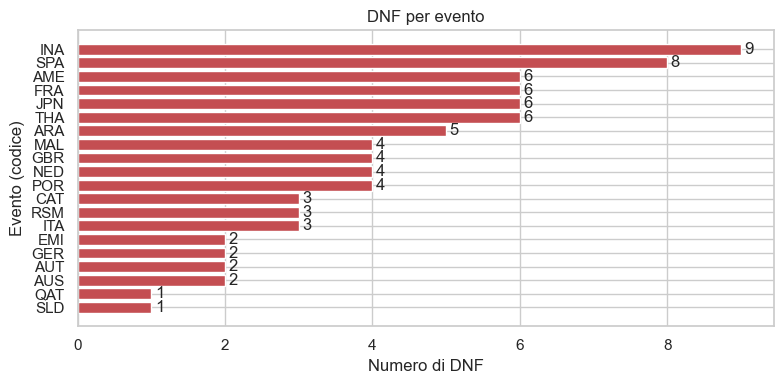

In [26]:
import sys
sys.path.append('../src')
from utils import load_data, get_dnfs_count_by_event, plot_dnfs_bar
import matplotlib.pyplot as plt

df = load_data('../data/Race.csv')  # carica il dataset
# Normalizzo i nomi delle colonne per coerenza con le funzioni utils
df_columns = df.columns.str.lower()

# Parametri
anno = 2024
classe = 'MotoGP'
session = 'Race'

# Calcolo DNFs per eventp
dnfs_by_event = get_dnfs_count_by_event(df, anno, classe, session)

if dnfs_by_event.empty:
    print(f"Nessun DNF trovato per anno={anno}, classe={classe}, session={session}.")
else:
    display(dnfs_by_event)
    ax = plot_dnfs_bar(dnfs_by_event, figsize=(8,4))
    if ax is not None:
        plt.show()

### Heatmap dei podi (pilota × evento) — analisi multi‑anno

Scopo:
- Visualizzare per ogni pilota dove ha ottenuto podi nei GP selezionati.
- Confrontare più stagioni sommando i podi (o mostrando la media se normalize=True).
I parametri principali sono `anni`, `classe` e `top_n` (numero di piloti mostrati).
"""

In [ ]:
import sys
sys.path.append('../src')
from utils import load_data, get_podiums_matrix, plot_podiums_heatmap
import matplotlib.pyplot as plt

df = load_data('../data/Race.csv')
df.columns = df.columns.str.lower()

anni = [2023, 2024]
classe = 'MotoGP'
sessione = 'Race'
top_n = 5      # mostra i top 20 piloti per numero di podi
normalize = False   

# Contruisci matrice podi e mostra prime righe
matrix = get_podiums_matrix(df, year=anni, classe=classe, session=sessione, top_n=top_n, normalize=normalize)
if matrix.empty:
    print("Nessun dato disponibile per i parametri specificati.")
else:
    display(matrix.head(5))
    ax = plot_championship_battle(matrix, figsize=(12,8), annot=True, fmt='d')
    if ax is not None:
        plt.show()